<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/RainFall_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/Rainfall.csv")

In [5]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df.shape

(366, 12)

In [9]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [10]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [14]:
# remove extra space in col names
df.columns=df.columns.str.strip()

In [15]:
df=df.drop(columns=['day'])

In [16]:
df.head(2)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3


In [17]:
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [18]:
# handle missing values
df['winddirection']=df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed']=df['windspeed'].fillna(df['windspeed'].median())

In [19]:
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [20]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
# converting yes no to 1 and 0
df['rainfall']=df['rainfall'].map({'yes':1,'no':0})

In [22]:
df.head(2)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3


In [23]:
df.shape

(366, 11)

In [24]:
sns.set(style='whitegrid')

In [25]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [27]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

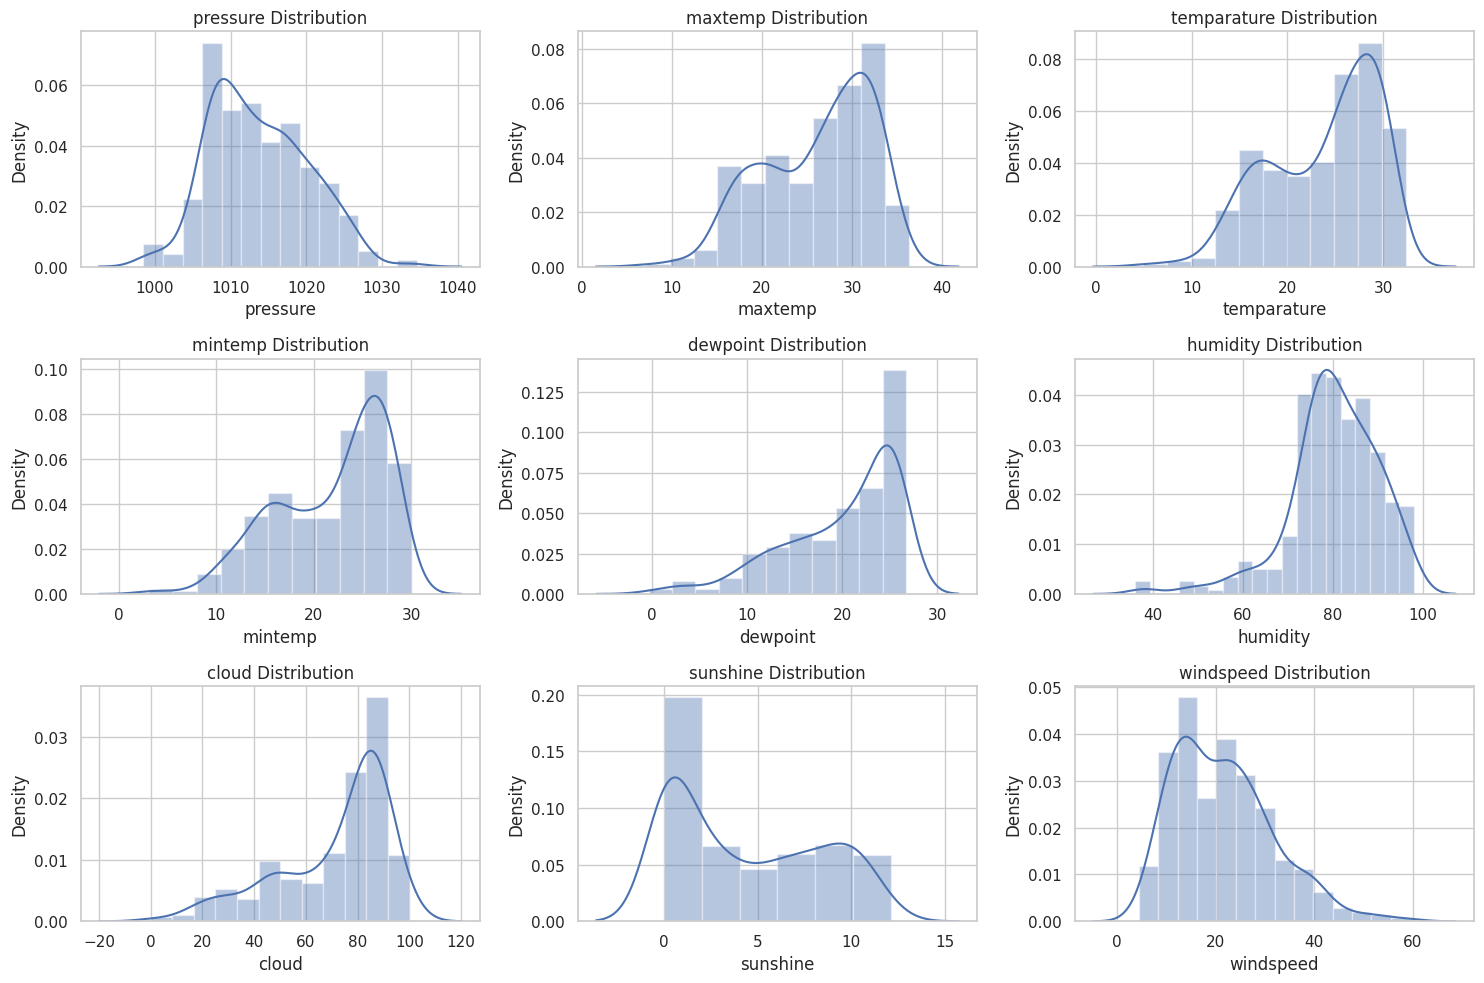

In [29]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.distplot(df[column])
  plt.xlabel(column)
  plt.title(f"{column} Distribution")

plt.tight_layout()
plt.show()


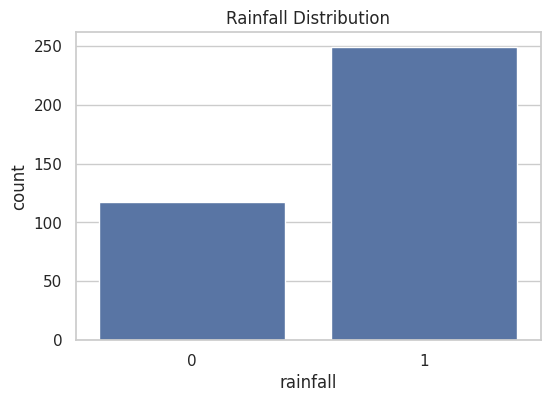

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall', data=df)
plt.title('Rainfall Distribution')
plt.show()

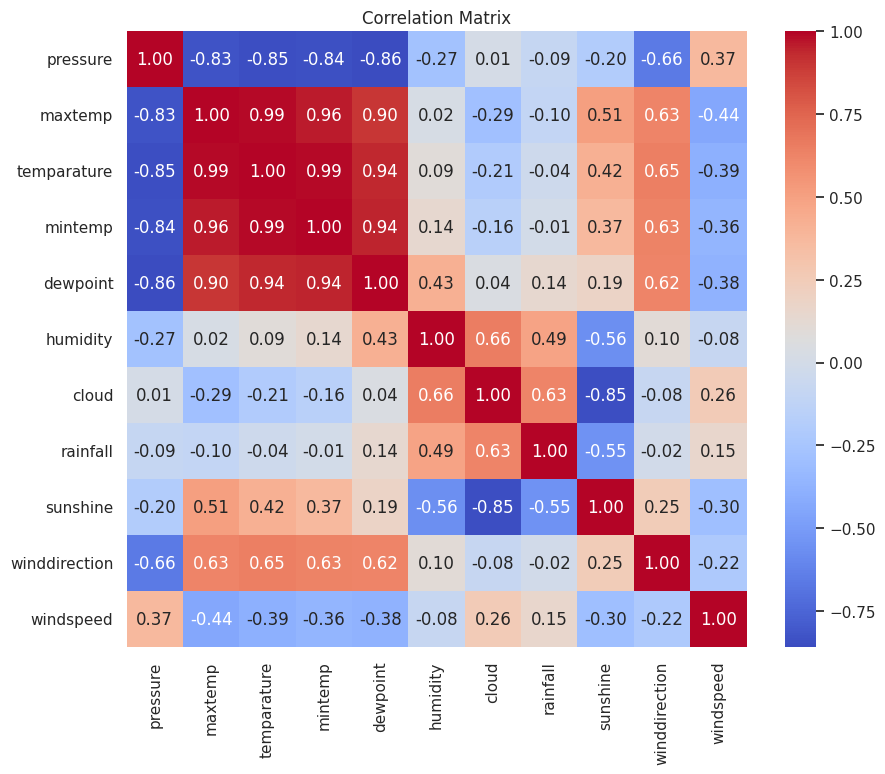

In [33]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

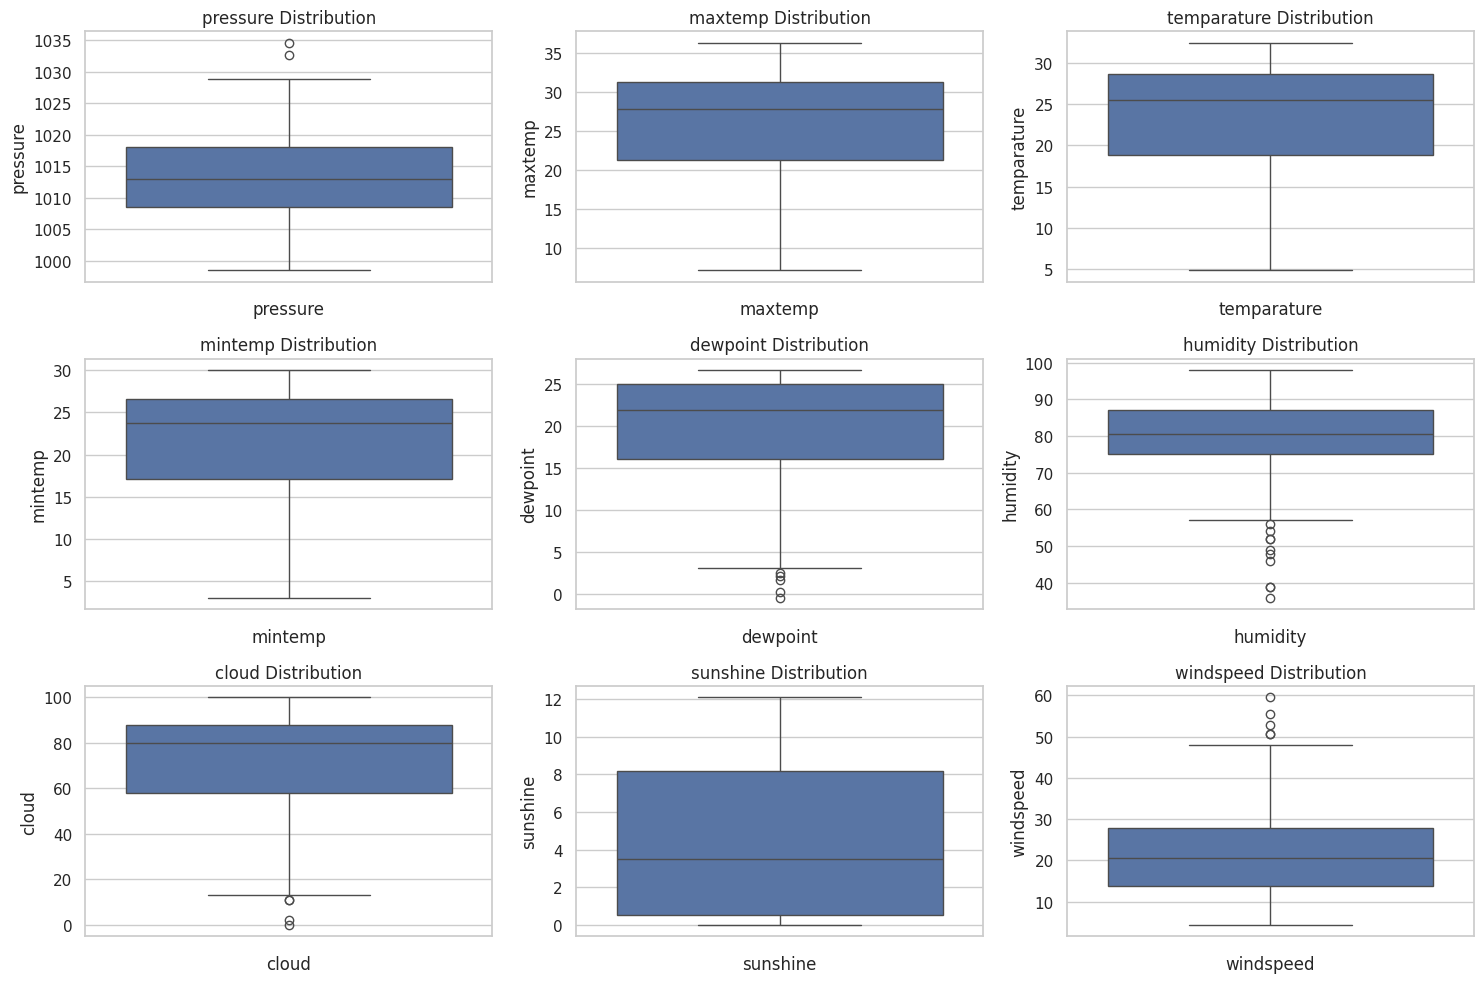

In [34]:
# Box plot for all
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(df[column])
  plt.xlabel(column)
  plt.title(f"{column} Distribution")

plt.tight_layout()
plt.show()


In [35]:
# drop highly correlated features which may lead to multlicollinearity problem
df=df.drop(columns=['maxtemp','temparature','mintemp'])

In [36]:
df.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [37]:
# Downsampling for class balancing
df['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [38]:
df_majority=df[df['rainfall']==1]
df_minority=df[df['rainfall']==0]

In [39]:
df_majority.shape

(249, 8)

In [40]:
df_minority.shape

(117, 8)

In [41]:
# down sample majority class to match minority count
df_majority_downsampled=resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_downsampled=pd.concat([df_majority_downsampled, df_minority])

In [42]:
df_downsampled.shape

(234, 8)

In [43]:
# suffling the final dataframe
df_downsampled=df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [45]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [46]:
# train test split
X=df_downsampled.drop(columns=['rainfall'])
Y=df_downsampled['rainfall']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [47]:
# Hyper Parameter Tuning
rf_model=RandomForestClassifier(random_state=42)
param_grid={
    "n_estimators":[50,100,200],
    "max_features":["sqrt","log2"],
    "max_depth":[None, 10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

grid_search=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [48]:
best_rf_model = grid_search.best_estimator_

In [49]:
print("best parameter combination",grid_search.best_params_)

best parameter combination {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [50]:
# Model Evaluation
cv_score=cross_val_score(best_rf_model,X_train,Y_train,cv=5)
print("Cross Validation score;",cv_score)
print("Mean Cross Validation score:",np.mean(cv_score))

Cross Validation score; [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean Cross Validation score: 0.818918918918919


In [51]:
#test set performance
Y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Set Accuracy:", accuracy)
classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)
confusion_matrix=confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Test Set Accuracy: 0.7446808510638298
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

Confusion Matrix:
 [[17  7]
 [ 5 18]]


In [52]:
# Save model

with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

In [53]:
# Prediction with loaded model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    input_data=[1015.9,19.9,95,81,0.0,40.0,13.7]
    input_data_as_array=np.asarray(input_data)
    input_data_reshaped=input_data_as_array.reshape(1,-1)
    prediction=loaded_model.predict(input_data_reshaped)
    print(prediction)
    if prediction[0]==0:
      print("No Rainfall")
    else:
      print("Rainfall")


[1]
Rainfall


In [55]:
# features names save
model_data={"model":best_rf_model,"columns":list(X.columns.tolist())}
with open("model_data.pkl","wb") as file:
  pickle.dump(model_data,file)

In [57]:
# Now load model_data.pkl
with open("model_data.pkl","rb") as file:
  data=pickle.load(file)
  model=data["model"]
  columns=data["columns"]
  print(columns)
  input_data=[1015.9,19.9,95,81,0.0,40.0,13.7]
  input_data_as_array=np.asarray(input_data)
  input_data_reshaped=input_data_as_array.reshape(1,-1)
  prediction=model.predict(input_data_reshaped)
  print(prediction)
  if prediction[0]==0:
    print("No Rainfall")
  else:
    print("Rainfall")

['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
[1]
Rainfall
